In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot
import os 
import tarfile
from six.moves import urllib

In [2]:
def load_csv(path):
    csv_path = os.path.join(path)
    return pd.read_csv(csv_path)

In [3]:
star_data = load_csv("/home/alexm/MAI/AI_labs/Sam_labs/lab1/classification_data/star_class.csv")
#https://www.kaggle.com/deepu1109/star-dataset

In [4]:
star_data.describe(include="all")

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
count,240.000000,240.000000,240.000000,240.000000,240.000000,240,240
unique,NaN,NaN,NaN,NaN,NaN,19,7
top,NaN,NaN,NaN,NaN,NaN,Red,M
freq,NaN,NaN,NaN,NaN,NaN,112,111
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000,NaN,NaN
std,9552.425037,179432.244940,517.155763,10.532512,1.711394,NaN,NaN
min,1939.000000,0.000080,0.008400,-11.920000,0.000000,NaN,NaN
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000,NaN,NaN
50%,5776.000000,0.070500,0.762500,8.313000,2.500000,NaN,NaN
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000,NaN,NaN


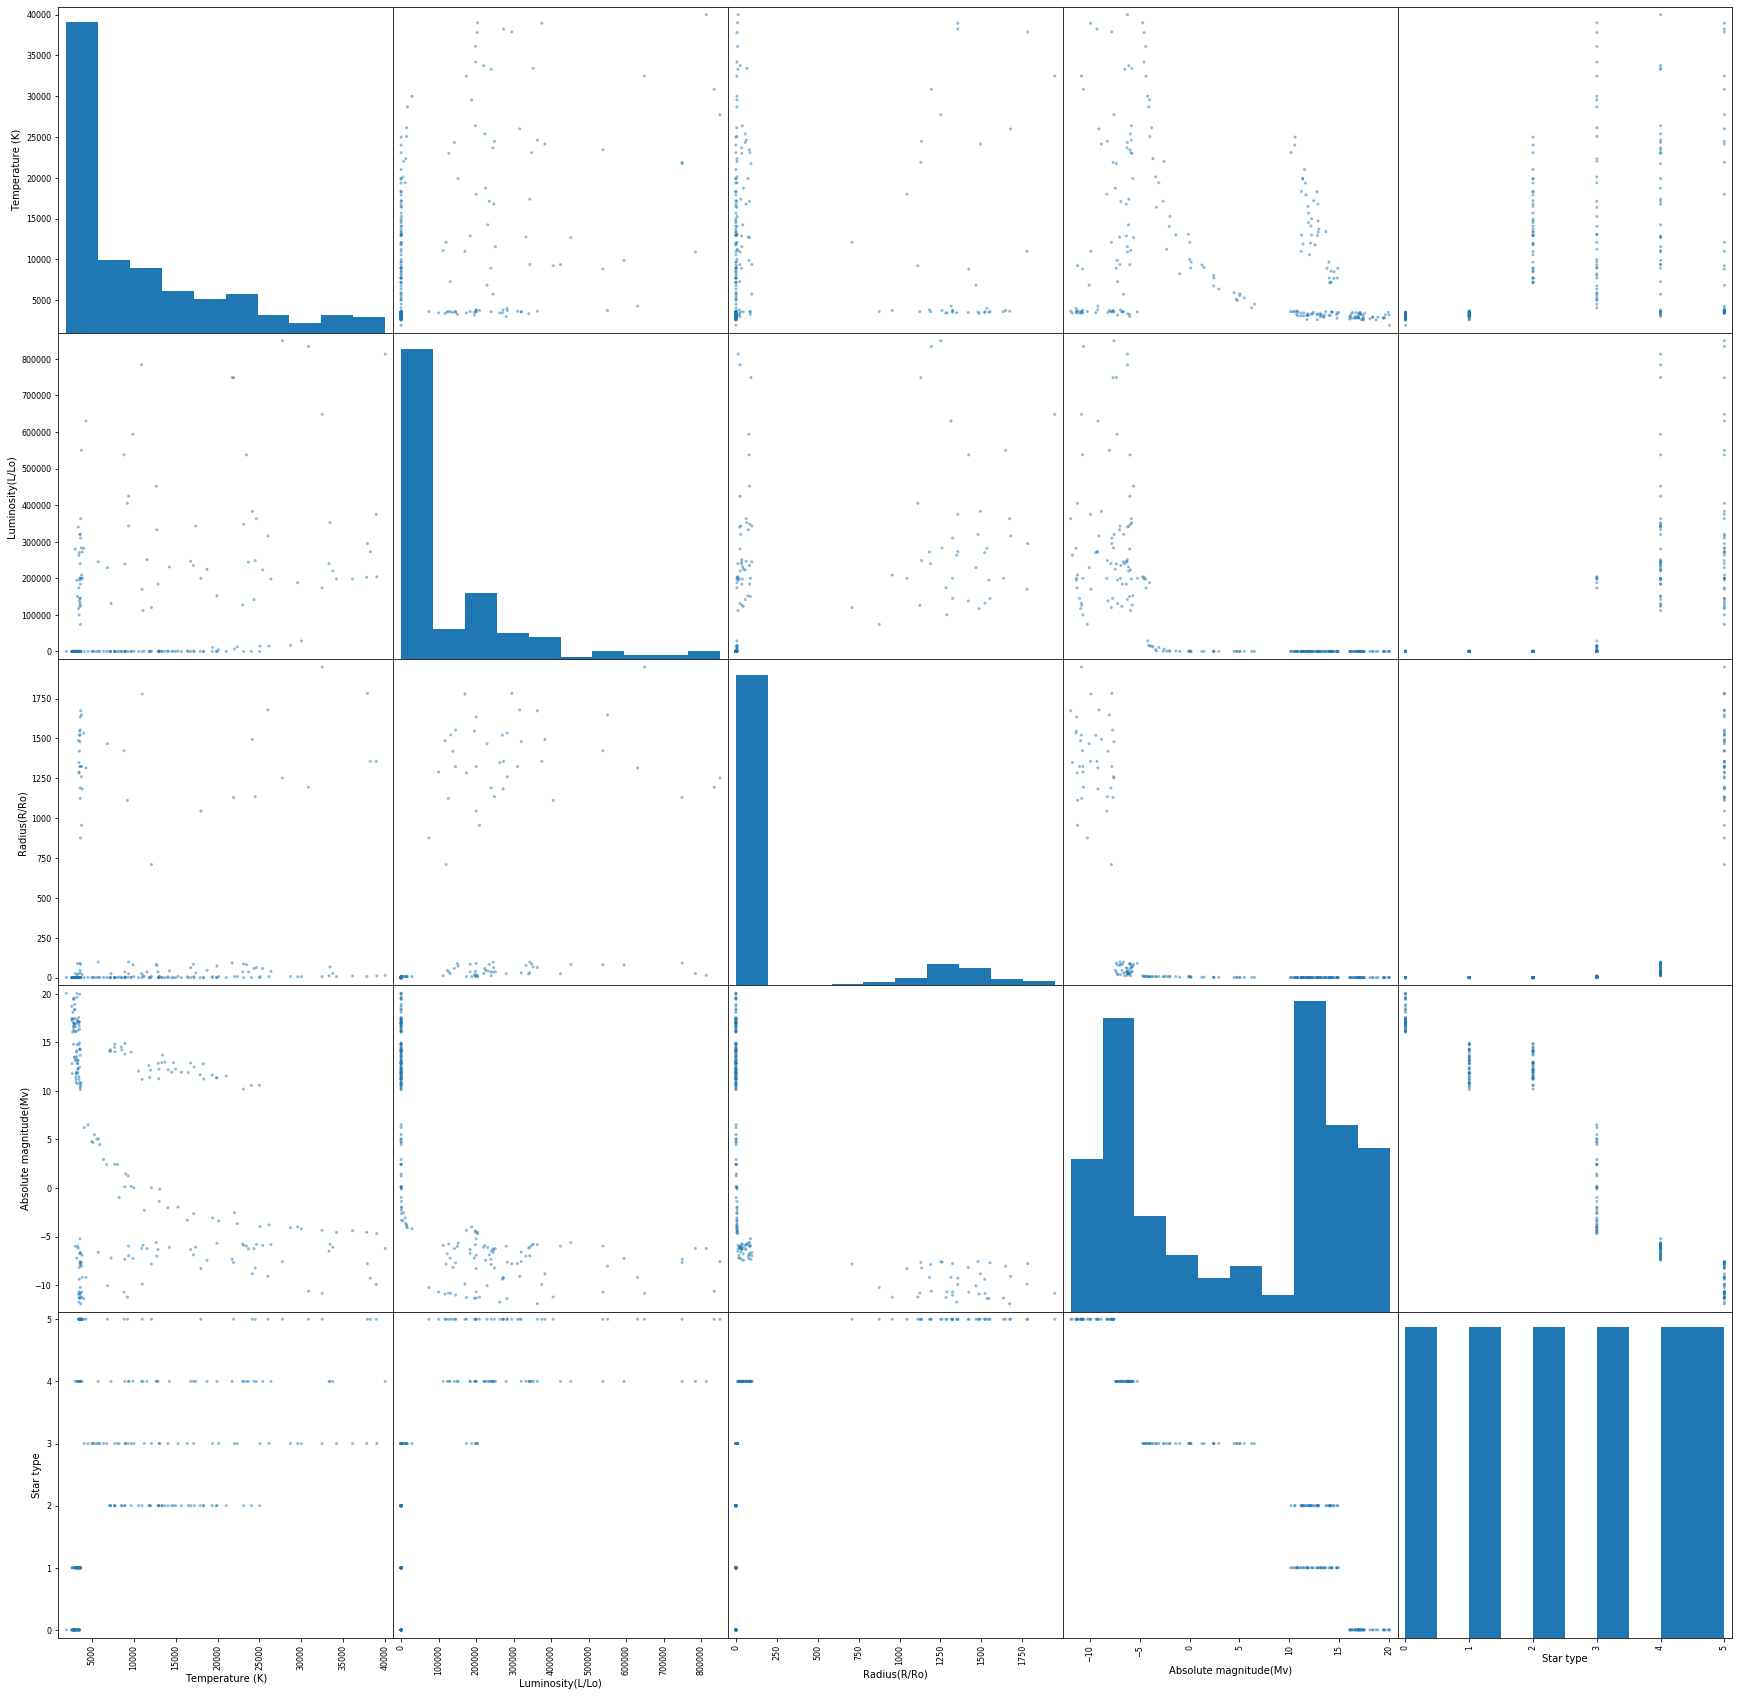

In [5]:
from pandas.plotting import scatter_matrix
attributes = star_data.columns
scatter_matrix(star_data, figsize=(30, 30));

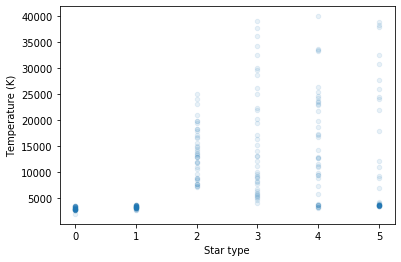

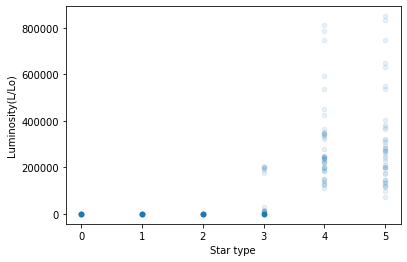

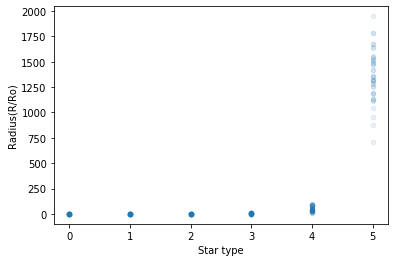

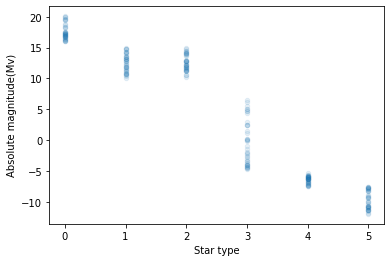

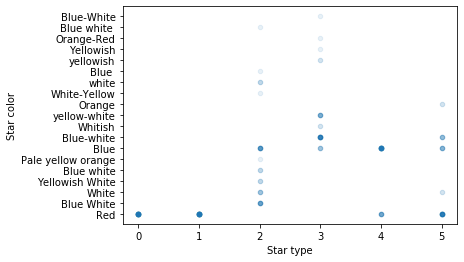

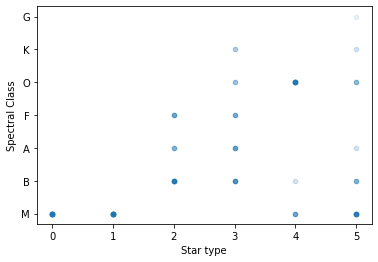

In [6]:
for field in star_data.columns:
    if field == "Star type":
        continue
    star_data.plot(kind="scatter", x="Star type", y=field, alpha=0.1)

In [7]:
min_corr = 0.1
star_data.corrwith(star_data["Star type"]).apply(lambda x : (abs(x), x)).sort_values(ascending=False).apply(lambda x : x[1]).where(lambda x : abs(x) > min_corr).dropna()

Star type                 1.000000
Absolute magnitude(Mv)   -0.955276
Luminosity(L/Lo)          0.676845
Radius(R/Ro)              0.660975
Temperature (K)           0.411129
dtype: float64

In [8]:
target = star_data["Star type"]
target.value_counts()

5    40
4    40
3    40
2    40
1    40
0    40
Name: Star type, dtype: int64

In [9]:
star_data = pd.concat([star_data.drop("Star type", axis=1), target], axis=1)
star_data

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class,Star type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


In [10]:
corr_fields = star_data.corrwith(star_data["Star type"]).apply(lambda x : (abs(x), x)).sort_values(ascending=False).apply(lambda x : x[1]).where(lambda x : abs(x) > min_corr).dropna()
print(corr_fields)

Star type                 1.000000
Absolute magnitude(Mv)   -0.955276
Luminosity(L/Lo)          0.676845
Radius(R/Ro)              0.660975
Temperature (K)           0.411129
dtype: float64


In [11]:
cat_factors = ["Star color", "Spectral Class"]

In [12]:
from sklearn.preprocessing import LabelBinarizer
for field in cat_factors:
    encoder = LabelBinarizer()
    hot_cat = encoder.fit_transform(star_data[field].apply(lambda x : field + '=' + ("Unk" if type(x) != str else x))).astype(float)
    tmp = pd.DataFrame(hot_cat, columns=encoder.classes_)
    star_data = pd.concat([star_data, tmp], axis=1)
    star_data.pop(field)
star_data

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color=Blue,Star color=Blue,Star color=Blue White,Star color=Blue white,Star color=Blue white,...,Star color=white,Star color=yellow-white,Star color=yellowish,Spectral Class=A,Spectral Class=B,Spectral Class=F,Spectral Class=G,Spectral Class=K,Spectral Class=M,Spectral Class=O
0,3068,0.002400,0.1700,16.12,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3042,0.000500,0.1542,16.60,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2600,0.000300,0.1020,18.70,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2800,0.000200,0.1600,16.65,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1939,0.000138,0.1030,20.06,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
236,30839,834042.000000,1194.0000,-10.63,5,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
237,8829,537493.000000,1423.0000,-10.73,5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
238,9235,404940.000000,1112.0000,-11.23,5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
star_data = star_data.drop("Star type", axis='columns')
corr_fields_ext = star_data.corrwith(target).apply(lambda x : (abs(x), x)).sort_values(ascending=False).apply(lambda x : x[1]).where(lambda x : abs(x) > min_corr).dropna()
print(corr_fields_ext)

Absolute magnitude(Mv)   -0.955276
Luminosity(L/Lo)          0.676845
Radius(R/Ro)              0.660975
Spectral Class=M         -0.447735
Star color=Red           -0.435244
Temperature (K)           0.411129
Spectral Class=O          0.399339
Star color=Blue           0.351192
Star color=Blue-white     0.196247
Star color=Orange         0.134191
Spectral Class=K          0.109388
dtype: float64


In [14]:

target

0      0
1      0
2      0
3      0
4      0
      ..
235    5
236    5
237    5
238    5
239    5
Name: Star type, Length: 240, dtype: int64

In [15]:
ready_data = pd.concat([star_data[corr_fields_ext.index], target], axis=1)
ready_data

,Absolute magnitude(Mv),Luminosity(L/Lo),Radius(R/Ro),Spectral Class=M,Star color=Red,Temperature (K),Spectral Class=O,Star color=Blue,Star color=Blue-white,Star color=Orange,Spectral Class=K,Star type
0,16.12,0.002400,0.1700,1.0,1.0,3068,0.0,0.0,0.0,0.0,0.0,0
1,16.60,0.000500,0.1542,1.0,1.0,3042,0.0,0.0,0.0,0.0,0.0,0
2,18.70,0.000300,0.1020,1.0,1.0,2600,0.0,0.0,0.0,0.0,0.0,0
3,16.65,0.000200,0.1600,1.0,1.0,2800,0.0,0.0,0.0,0.0,0.0,0
4,20.06,0.000138,0.1030,1.0,1.0,1939,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
235,-9.93,374830.000000,1356.0000,0.0,0.0,38940,1.0,1.0,0.0,0.0,0.0,5
236,-10.63,834042.000000,1194.0000,0.0,0.0,30839,1.0,1.0,0.0,0.0,0.0,5
237,-10.73,537493.000000,1423.0000,0.0,0.0,8829,0.0,0.0,0.0,0.0,0.0,5
238,-11.23,404940.000000,1112.0000,0.0,0.0,9235,0.0,0.0,0.0,0.0,0.0,5


In [16]:
ready_data.to_csv("/home/alexm/MAI/AI_labs/Sam_labs/lab1/classification_data/star_class_ready.csv")